In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# calculate square distance for each center

def square_distance(points, centers):
    
    differences = [points - center for center in centers]
    
    sq_differences = np.array( [np.sum(difference**2, axis=1) for difference in differences] )
    
    return sq_differences

In [3]:
# assign each point to a center by minimum square distance

def generate_assignment(square_distances):
    
    correspondence = np.stack(square_distances, axis=1)
    
    assignments = np.argmin(correspondence, axis=1)
    
    return assignments

In [4]:
# plotting function for assignment to a center

def plot_correspondence(points, assignments, centers, name='default_name'):
    
    plt.figure(figsize=[12,12])
        
    plt.scatter(points[:, 0], points[:, 1], c=plt.cm.Set1(assignments))
    
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=100,\
                c=plt.cm.Set1(np.arange(0, len(centers))), edgecolors='k')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.title(name)
    
    plt.show()

In [5]:
# calculates the new centroids

def calculate_centroids(points, assignments, no_centers=2):
    
    centroids = []
    
    for i in range(no_centers):
        point_split = points[np.equal(assignments, i)]
        
        centx = np.mean(point_split[:, 0])
        centy = np.mean(point_split[:, 1])
        
        centroids.append(np.array([centx, centy]))
        
    return np.array(centroids)

In [6]:
# generate the cluster points

half_no_points = 5000

m1 = 3
s1 = 2
m2 = 11
s2 = 3

p1 = np.random.normal(m1, s1, size=half_no_points)
p2 = np.random.normal(m1, s1, size=half_no_points)

p3 = np.random.normal(m2, s2, size=half_no_points)
p4 = np.random.normal(m2, s2, size=half_no_points)

points = np.concatenate( (np.stack([p3, p4], axis=1), np.stack([p1, p2], axis=1)) )

# generate the initial cluster centers

no_clusters = 2

xmin = np.amin(points[:,0])
xmax = np.amax(points[:,0])
ymin = np.amin(points[:,1])
ymax = np.amax(points[:,1])

centers = np.stack([np.random.uniform(low=xmin, high=xmax, size=no_clusters),\
                    np.random.uniform(low=ymin, high=ymax, size=no_clusters)], axis=1)


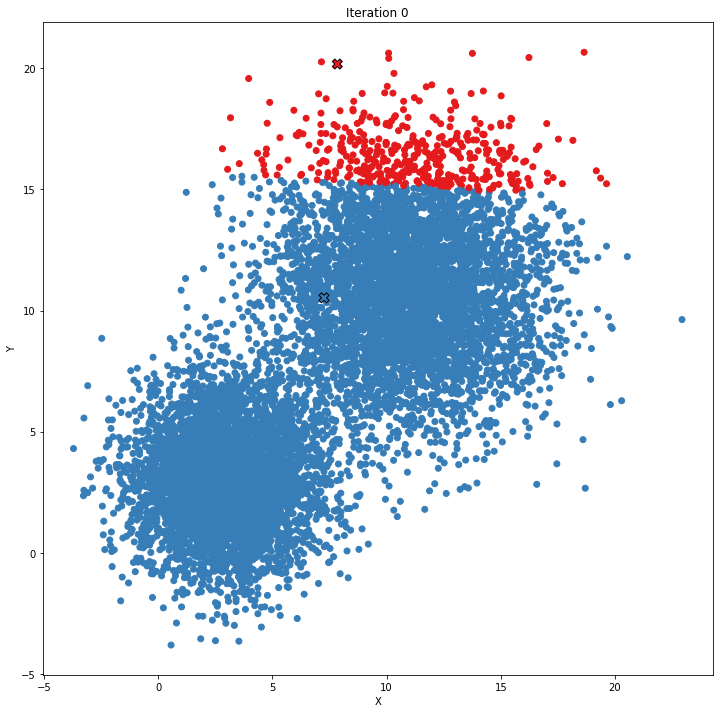

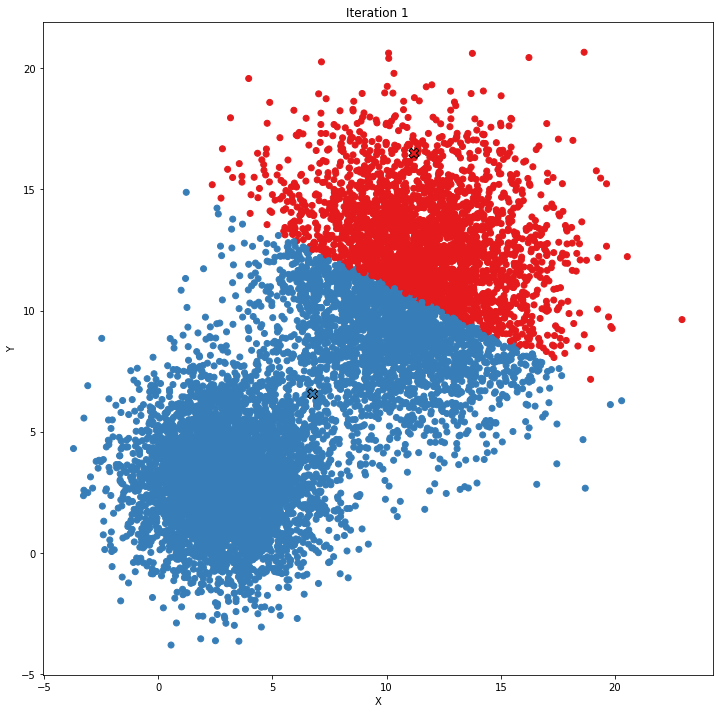

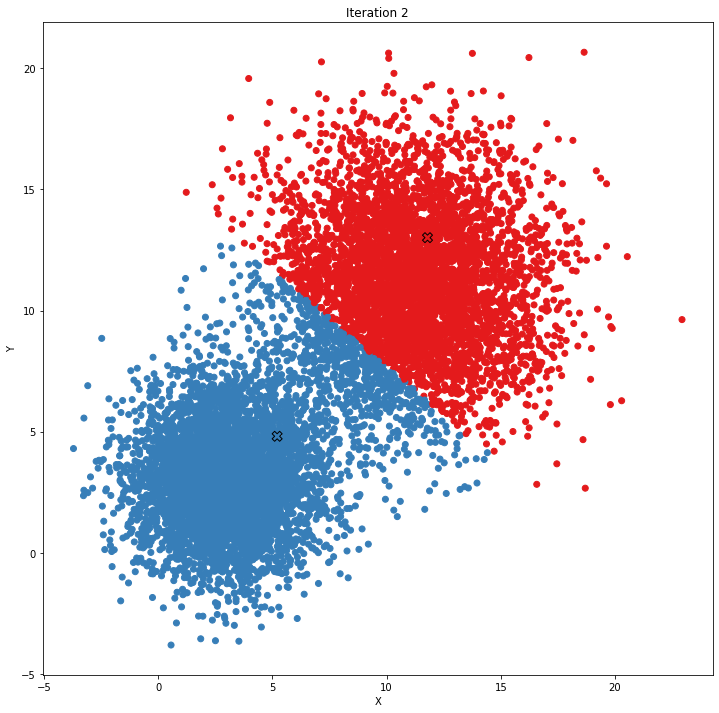

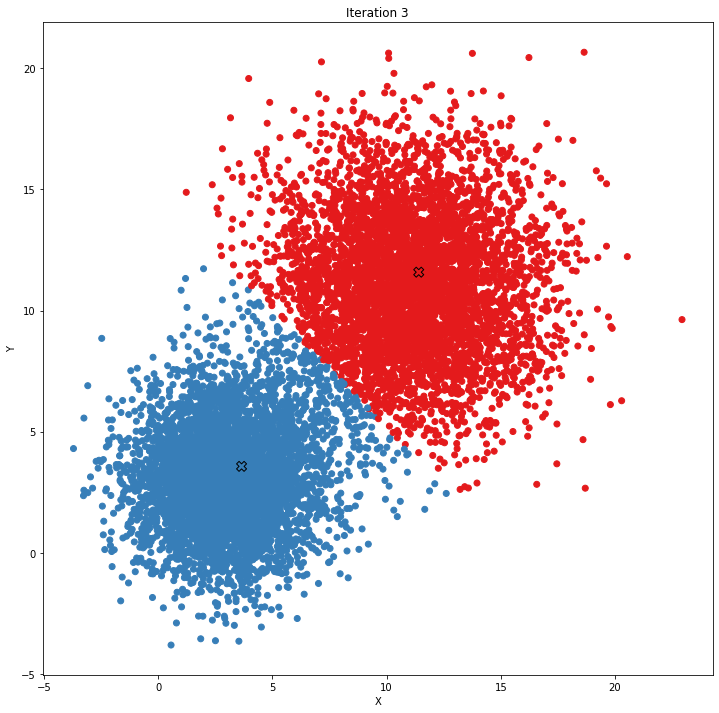

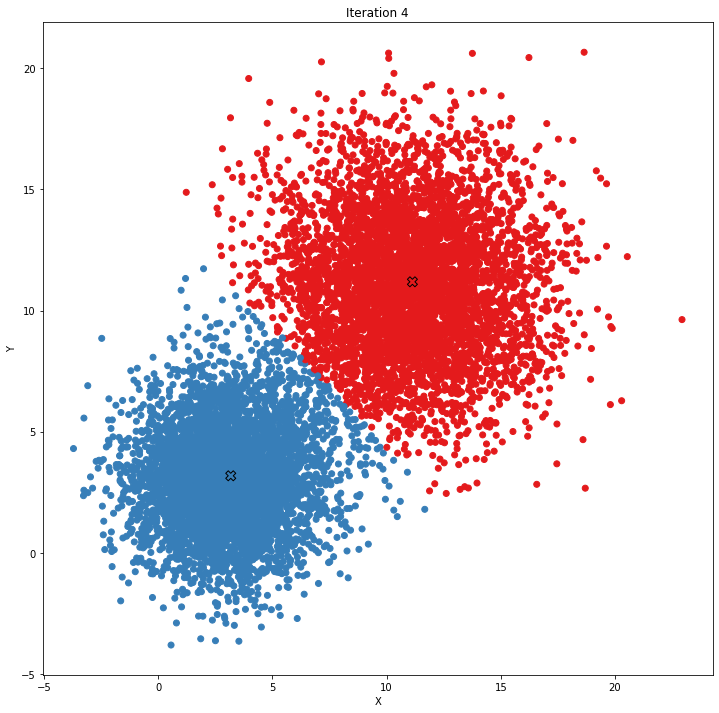

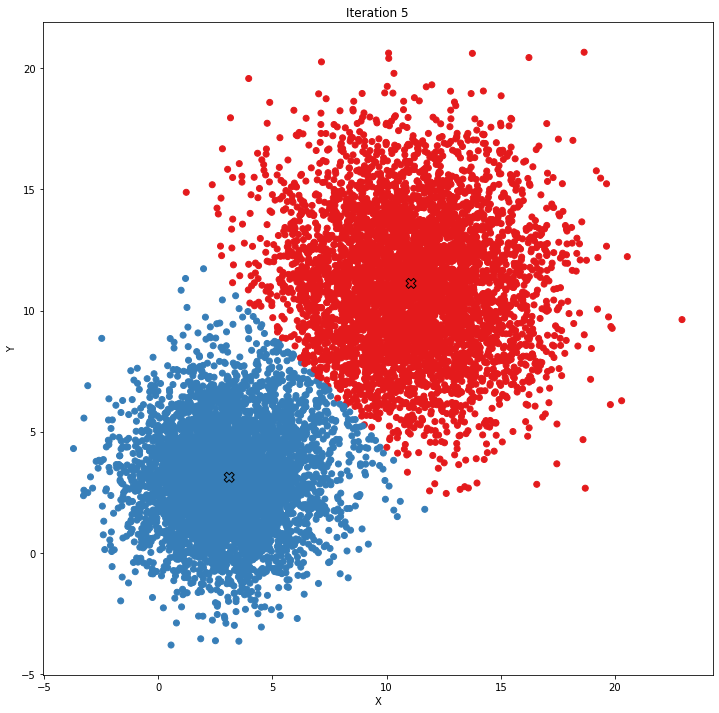

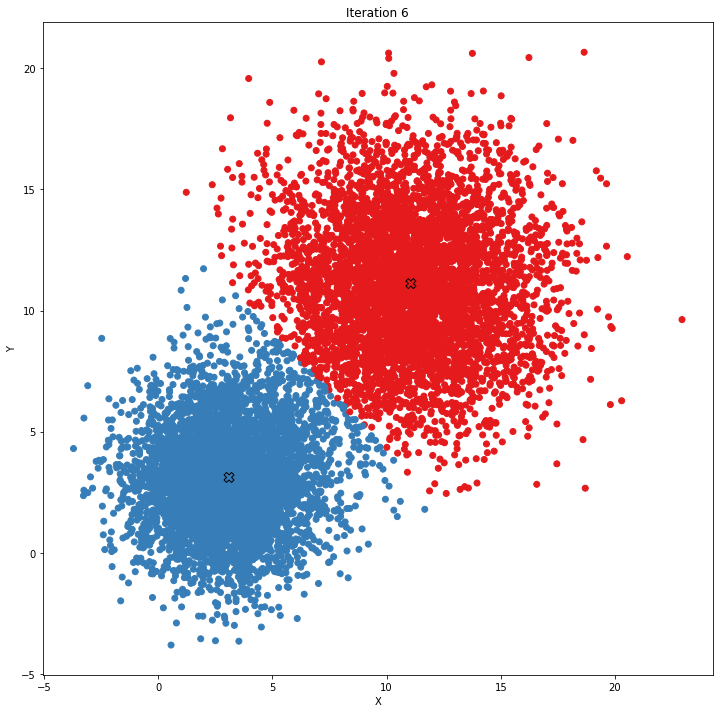

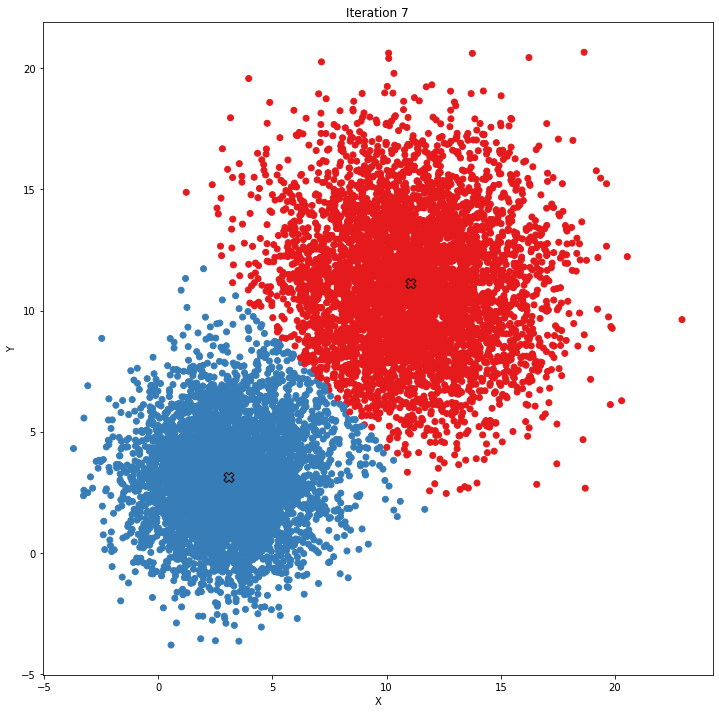

Assignments Converged!
Centers are:
[[11.06314207 11.10960312]
 [ 3.1006438   3.11123481]]


In [7]:
i = 0

while True:
    
    
    square_distances = square_distance(points, centers)
    
    assignments = generate_assignment(square_distances)
    
    plot_correspondence(points, assignments, centers, name='Iteration {}'.format(i))
    
    new_centers = calculate_centroids(points, assignments)
    
    if np.array_equal(centers, new_centers):
        
        print('Assignments Converged!')
        print('Centers are:')
        print(centers)
        
        break
    
    else:
        
        i += 1
        centers = new_centers
        